### Metodologia 

Problemas
1 - Tem muitos dados faltantes.<br>
1 - Para resolver os dados faltantes devo estudar o que cada atributo significa e como tenho uma dataset com muitos anos de histórico posso achar dados similares para prenchelos,
acredito que posso usar regressão para isso, uma vez que os dados realmente são co-relacionados. <br>
1.1 - Mas como separar os dados certos para o treinamento do algoritmo? <br>
1.1 - Estou pensando em separar em varias amostras por mês e então trabalhar com os valores faltantes de cada uma. <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc 
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
gc.collect()

15

In [3]:
df_data_cj = pd.read_csv("../datasets/Campos do Jordao/dados_completos_mensais_1980a2019_campos_do_jordao/dados_completos_mensais_1980a2019_campos_do_jordao.csv", sep=";")

In [4]:
df_data_cj.head()

,Estacao,Data,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,...,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoNivelMarMedia,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20
0,83714,31/01/1980,0,27.0,1.818182,7.0,NaN,NaN,NaN,NaN,...,NaN,218.1,NaN,841.133333,21.118182,16.532727,12.609091,NaN,NaN,NaN
1,83714,29/02/1980,0,0.0,1.269231,9.0,NaN,NaN,NaN,NaN,...,18.0,190.2,NaN,841.173077,22.569231,17.359231,13.107692,87.009615,NaN,NaN
2,83714,31/03/1980,0,0.0,0.817073,2.0,48.2,NaN,NaN,131.9,...,NaN,110.5,NaN,843.598780,23.548148,17.135556,11.637037,86.814815,NaN,NaN
3,83714,30/04/1980,0,18.0,0.901408,2.0,NaN,NaN,NaN,NaN,...,NaN,243.0,NaN,843.129577,20.862500,15.311667,10.904167,89.489583,NaN,NaN
4,83714,31/05/1980,0,0.0,0.736842,2.0,NaN,NaN,NaN,NaN,...,NaN,3.9,NaN,844.898246,20.242105,12.549474,5.889474,NaN,NaN,NaN


In [5]:
df_data_cj['Day'] = pd.to_datetime(df_data_cj["Data"]).dt.day
df_data_cj["Month"] = pd.to_datetime(df_data_cj["Data"]).dt.month
df_data_cj["Year"] = pd.to_datetime(df_data_cj["Data"]).dt.year
df_data_cj.head()

,Estacao,Data,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,...,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20,Day,Month,Year
0,83714,31/01/1980,0,27.0,1.818182,7.0,NaN,NaN,NaN,NaN,...,841.133333,21.118182,16.532727,12.609091,NaN,NaN,NaN,31,1,1980
1,83714,29/02/1980,0,0.0,1.269231,9.0,NaN,NaN,NaN,NaN,...,841.173077,22.569231,17.359231,13.107692,87.009615,NaN,NaN,29,2,1980
2,83714,31/03/1980,0,0.0,0.817073,2.0,48.2,NaN,NaN,131.9,...,843.598780,23.548148,17.135556,11.637037,86.814815,NaN,NaN,31,3,1980
3,83714,30/04/1980,0,18.0,0.901408,2.0,NaN,NaN,NaN,NaN,...,843.129577,20.862500,15.311667,10.904167,89.489583,NaN,NaN,30,4,1980
4,83714,31/05/1980,0,0.0,0.736842,2.0,NaN,NaN,NaN,NaN,...,844.898246,20.242105,12.549474,5.889474,NaN,NaN,NaN,31,5,1980


In [6]:
df_data_cj.drop("Data", axis=1, inplace=True)

In [7]:
df_data_cj.columns

Index(['Estacao', 'Hora', 'DirecaoVento', 'VelocidadeVentoMedia',
       'VelocidadeVentoMaximaMedia', 'EvaporacaoPiche', 'EvapoBHPotencial',
       'EvapoBHReal', 'InsolacaoTotal', 'NebulosidadeMedia',
       'NumDiasPrecipitacao', 'PrecipitacaoTotal', 'PressaoNivelMarMedia',
       'PressaoMedia', 'TempMaximaMedia', 'TempCompensadaMedia',
       'TempMinimaMedia', 'UmidadeRelativaMedia', 'VisibilidadeMedia',
       'Unnamed: 20', 'Day', 'Month', 'Year'],
      dtype='object')

In [8]:
# Preciso separar somente os dados do mês de Julho de todos os anos que tenho
month_july = df_data_cj.query("Month == 7")

# Separando os dados do mês de Dezembro de todos os anos
month_december = df_data_cj.query("Month == 12")

In [9]:
# Agrupando os dados de mês e ano com os dados da média da temperatura mínima de Julho de todos os anos
temp_min_mean_july = month_july.groupby(["Month","Year"])["TempMinimaMedia"].mean().reset_index(name="TempMinimaMedia")

# Agrupando os dados de mês e ano com os dados da média da temperatura máxima de Julho de todos os anos
temp_max_mean_july = month_july.groupby(["Month","Year"])["TempMaximaMedia"].mean().reset_index(name="TempMaximaMedia")

# Agrupando os dados de mês e ano com os dados da média da temperatura mínima de Dezembro de todos os anos
temp_min_mean_decemb = month_december.groupby(["Month","Year"])["TempMinimaMedia"].mean().reset_index(name="TempMinimaMedia")

# Agrupando os dados de mês e ano com os dados da média da temperatura máxima de Dezembro de todos os anos
temp_max_mean_decemb = month_december.groupby(["Month","Year"])["TempMaximaMedia"].mean().reset_index(name="TempMaximaMedia")

In [10]:
temp_max_mean_july.sort_values(by="TempMaximaMedia").head()

,Month,Year,TempMaximaMedia
33,7,2014,15.474194
7,7,1988,15.551613
23,7,2004,16.035484
32,7,2013,16.238710
31,7,2012,16.341935


In [11]:
temp_max_mean_july.sort_values(by="TempMaximaMedia")[-5:]

,Month,Year,TempMaximaMedia
20,7,2001,19.254839
37,7,2018,19.680769
0,7,1980,NaN
1,7,1981,NaN
21,7,2002,NaN


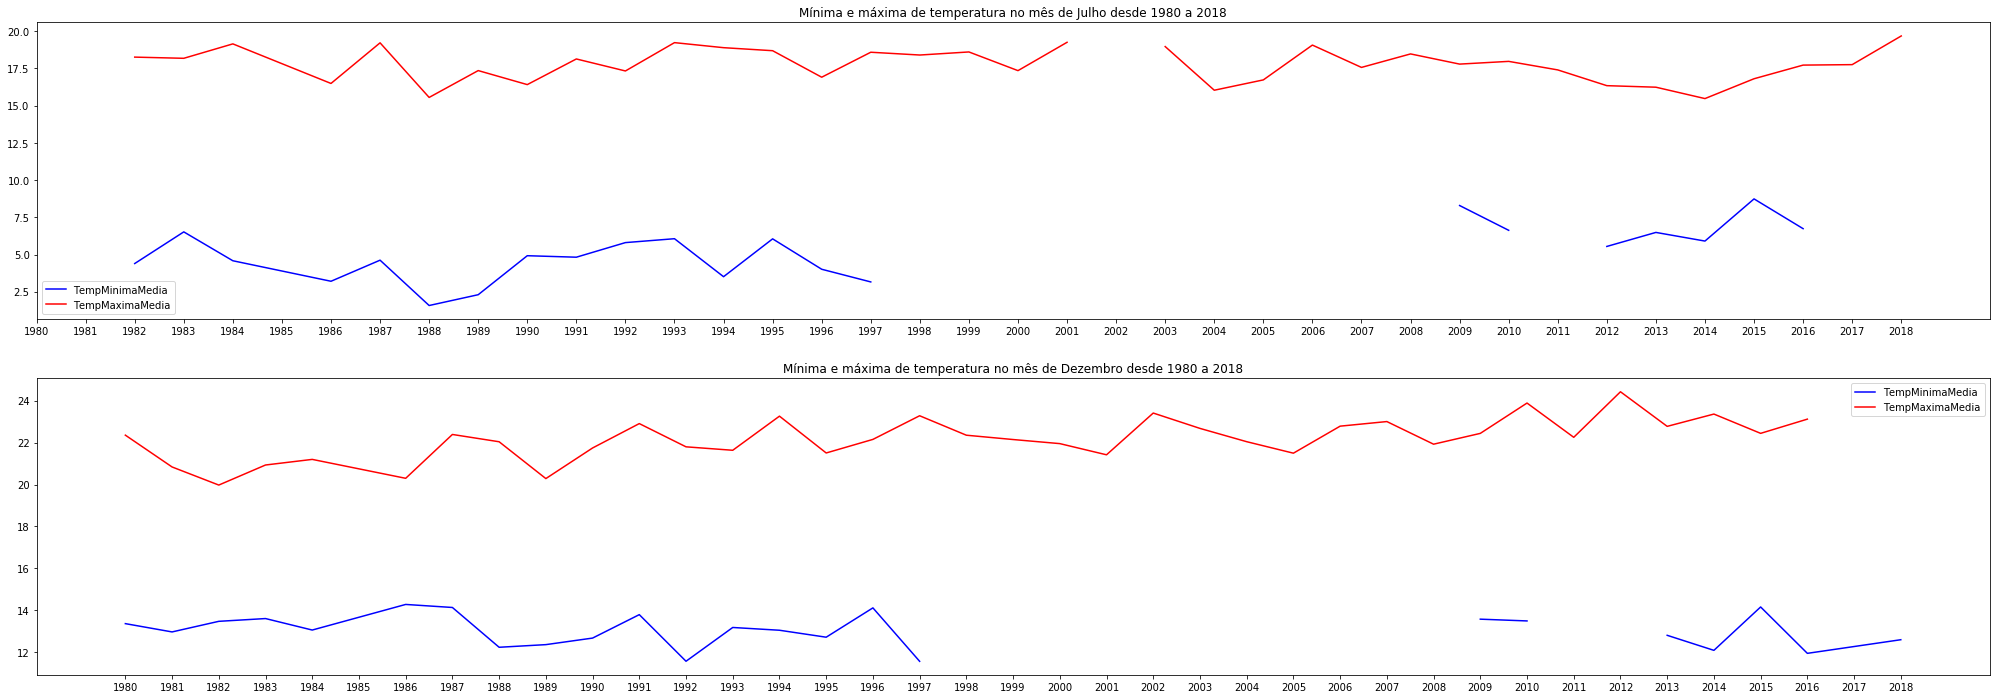

In [12]:
fig = plt.figure(figsize=(35,12))

# Mínima e máxima de temperatura no mês de Julho desde 1980 a 2018
ax1 = fig.add_subplot(2,1,1)
ax1.plot(temp_min_mean_july["Year"], temp_min_mean_july["TempMinimaMedia"], color="blue", linestyle="solid", label='TempMinimaMedia')
ax1.plot(temp_max_mean_july["Year"], temp_max_mean_july["TempMaximaMedia"], color="red", linestyle="solid", label="TempMaximaMedia" )
ax1.legend(loc='best')
ax1.set_title("Mínima e máxima de temperatura no mês de Julho desde 1980 a 2018")
ax1.set_xticks(range(1980, 2019))

#extrem_temp = [
#    (datetime(2014), "Menor média das temperaturas máximas")
#]

#for date, label in extrem_temp:
#    ax1.annotate(label, xy = (date, ax1.asof()))


# Mínima e máxima de temperatura no mês de Dezembro desde 1980 a 2018
ax2 = fig.add_subplot(2,1,2)
ax2.plot(temp_min_mean_decemb["Year"], temp_min_mean_decemb["TempMinimaMedia"], color="blue", linestyle="solid", label="TempMinimaMedia")
ax2.plot(temp_max_mean_decemb["Year"], temp_max_mean_decemb["TempMaximaMedia"], color="red", linestyle="solid", label="TempMaximaMedia")
ax2.legend(loc='best')
ax2.set_title("Mínima e máxima de temperatura no mês de Dezembro desde 1980 a 2018")
ax2.set_xticks(range(1980, 2019))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f297e07efd0>,
      dtype=object)

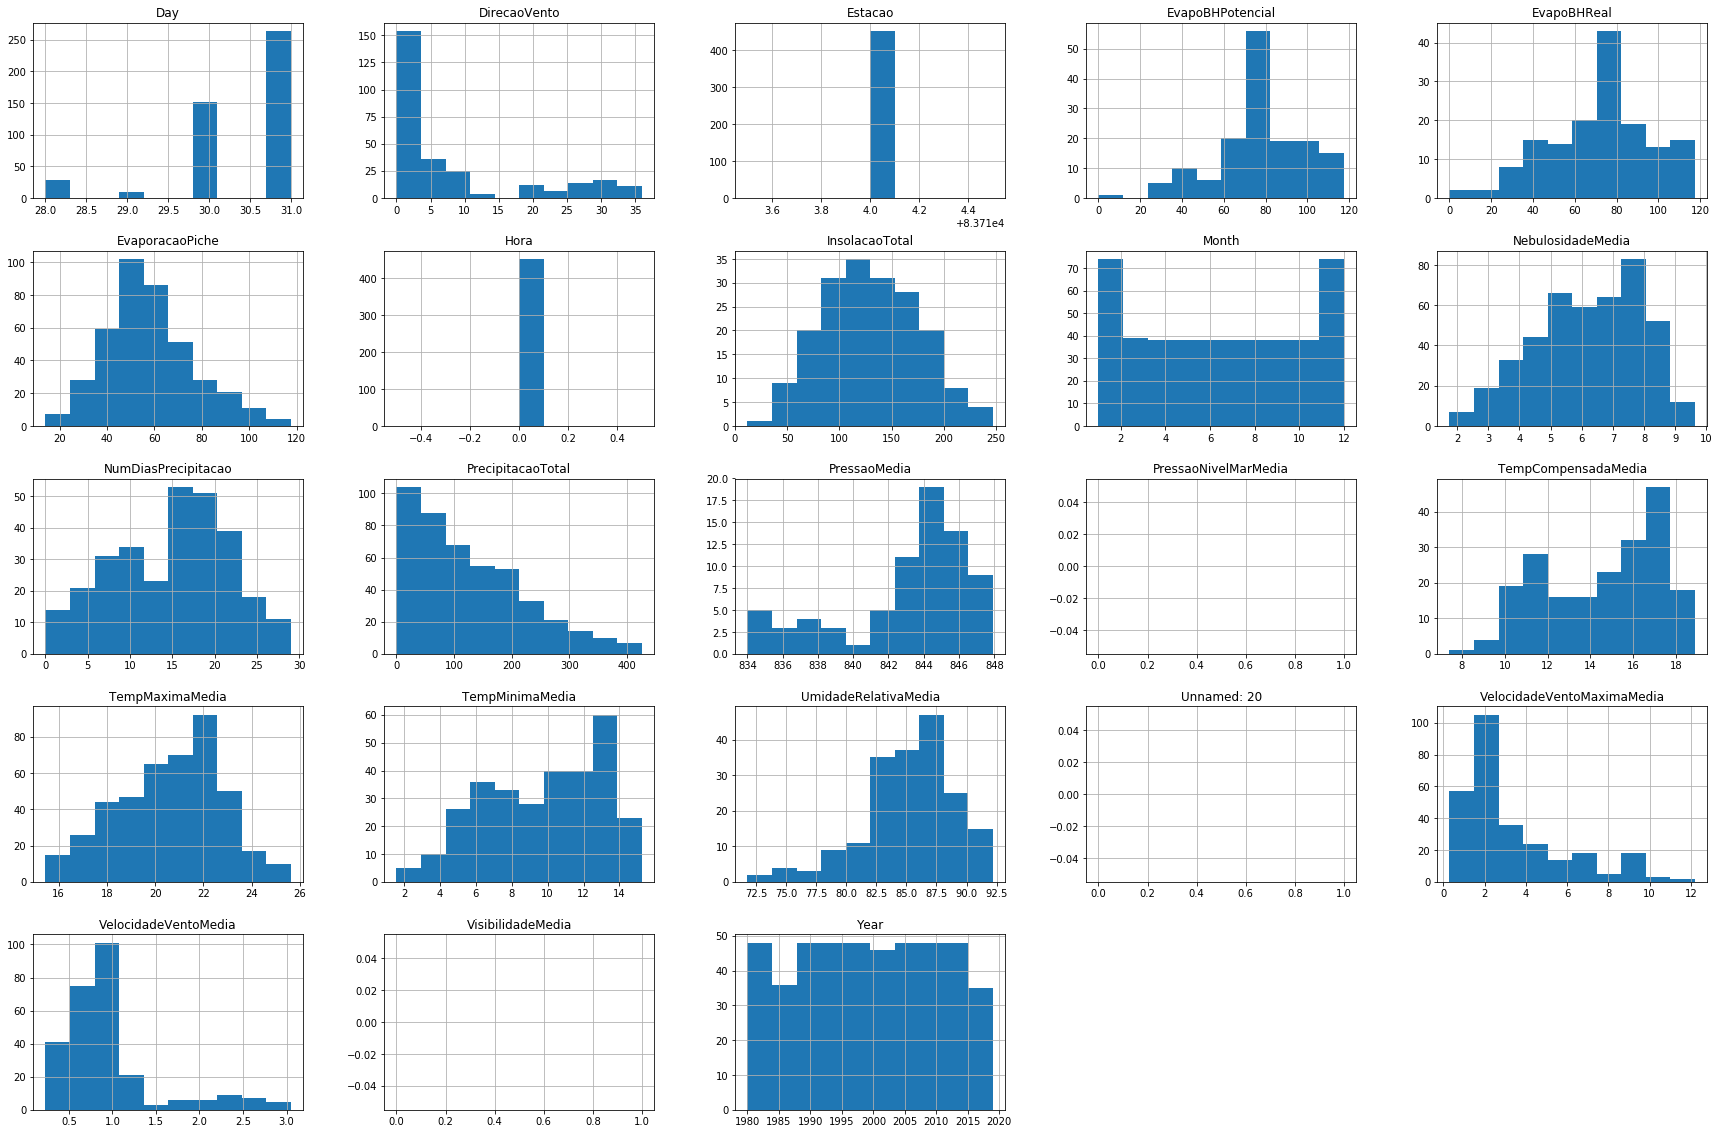

In [13]:
df_data_cj.hist(figsize=(30,20))

In [14]:
df_data_cj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 23 columns):
Estacao                       453 non-null int64
Hora                          453 non-null int64
DirecaoVento                  279 non-null float64
VelocidadeVentoMedia          274 non-null float64
VelocidadeVentoMaximaMedia    282 non-null float64
EvaporacaoPiche               397 non-null float64
EvapoBHPotencial              151 non-null float64
EvapoBHReal                   151 non-null float64
InsolacaoTotal                187 non-null float64
NebulosidadeMedia             439 non-null float64
NumDiasPrecipitacao           295 non-null float64
PrecipitacaoTotal             453 non-null float64
PressaoNivelMarMedia          0 non-null float64
PressaoMedia                  74 non-null float64
TempMaximaMedia               436 non-null float64
TempCompensadaMedia           204 non-null float64
TempMinimaMedia               301 non-null float64
UmidadeRelativaMedia          188 n

In [15]:
df_data_cj.describe()

,Estacao,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,NebulosidadeMedia,...,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,VisibilidadeMedia,Unnamed: 20,Day,Month,Year
count,453.0,453.0,279.000000,274.000000,282.000000,397.000000,151.000000,151.000000,187.000000,439.000000,...,74.000000,436.000000,204.000000,301.000000,188.000000,0.0,0.0,453.000000,453.000000,453.000000
mean,83714.0,0.0,7.645161,0.971430,3.352443,58.073048,77.416950,71.967858,130.216043,6.207710,...,842.992403,20.620528,14.569801,9.780839,85.180043,NaN,NaN,30.437086,6.494481,1999.333333
std,0.0,0.0,11.432295,0.584693,2.598605,18.604013,20.788517,24.382063,45.988073,1.716661,...,3.754753,2.161945,2.744995,3.298506,3.921833,NaN,NaN,0.813950,3.435640,11.200374
min,83714.0,0.0,0.000000,0.230769,0.300000,14.000000,0.000000,0.000000,12.200000,1.755556,...,834.003226,15.450000,7.418065,1.574194,71.787037,NaN,NaN,28.000000,1.000000,1980.000000
25%,83714.0,0.0,0.000000,0.677778,2.000000,46.100000,69.236634,57.657809,99.350000,4.943152,...,841.652423,18.967742,11.960277,6.770833,83.002016,NaN,NaN,30.000000,4.000000,1990.000000
50%,83714.0,0.0,0.000000,0.833333,2.000000,55.700000,77.122667,74.463265,127.800000,6.365385,...,844.014762,20.923333,15.206334,10.441935,85.570301,NaN,NaN,31.000000,6.000000,1999.000000
75%,83714.0,0.0,9.000000,1.051363,5.000000,69.200000,89.149627,86.430284,160.150000,7.649675,...,845.638131,22.206586,16.987488,12.724138,87.705645,NaN,NaN,31.000000,9.000000,2009.000000
max,83714.0,0.0,36.000000,3.050310,12.200000,117.600000,117.442971,117.442971,246.900000,9.630435,...,847.924242,25.631034,18.886429,15.254839,92.196429,NaN,NaN,31.000000,12.000000,2019.000000


In [16]:
df_data_cj.shape

(453, 23)

In [17]:
df_data_cj.drop(["VisibilidadeMedia","Unnamed: 20","PressaoNivelMarMedia"], axis=1, inplace=True)

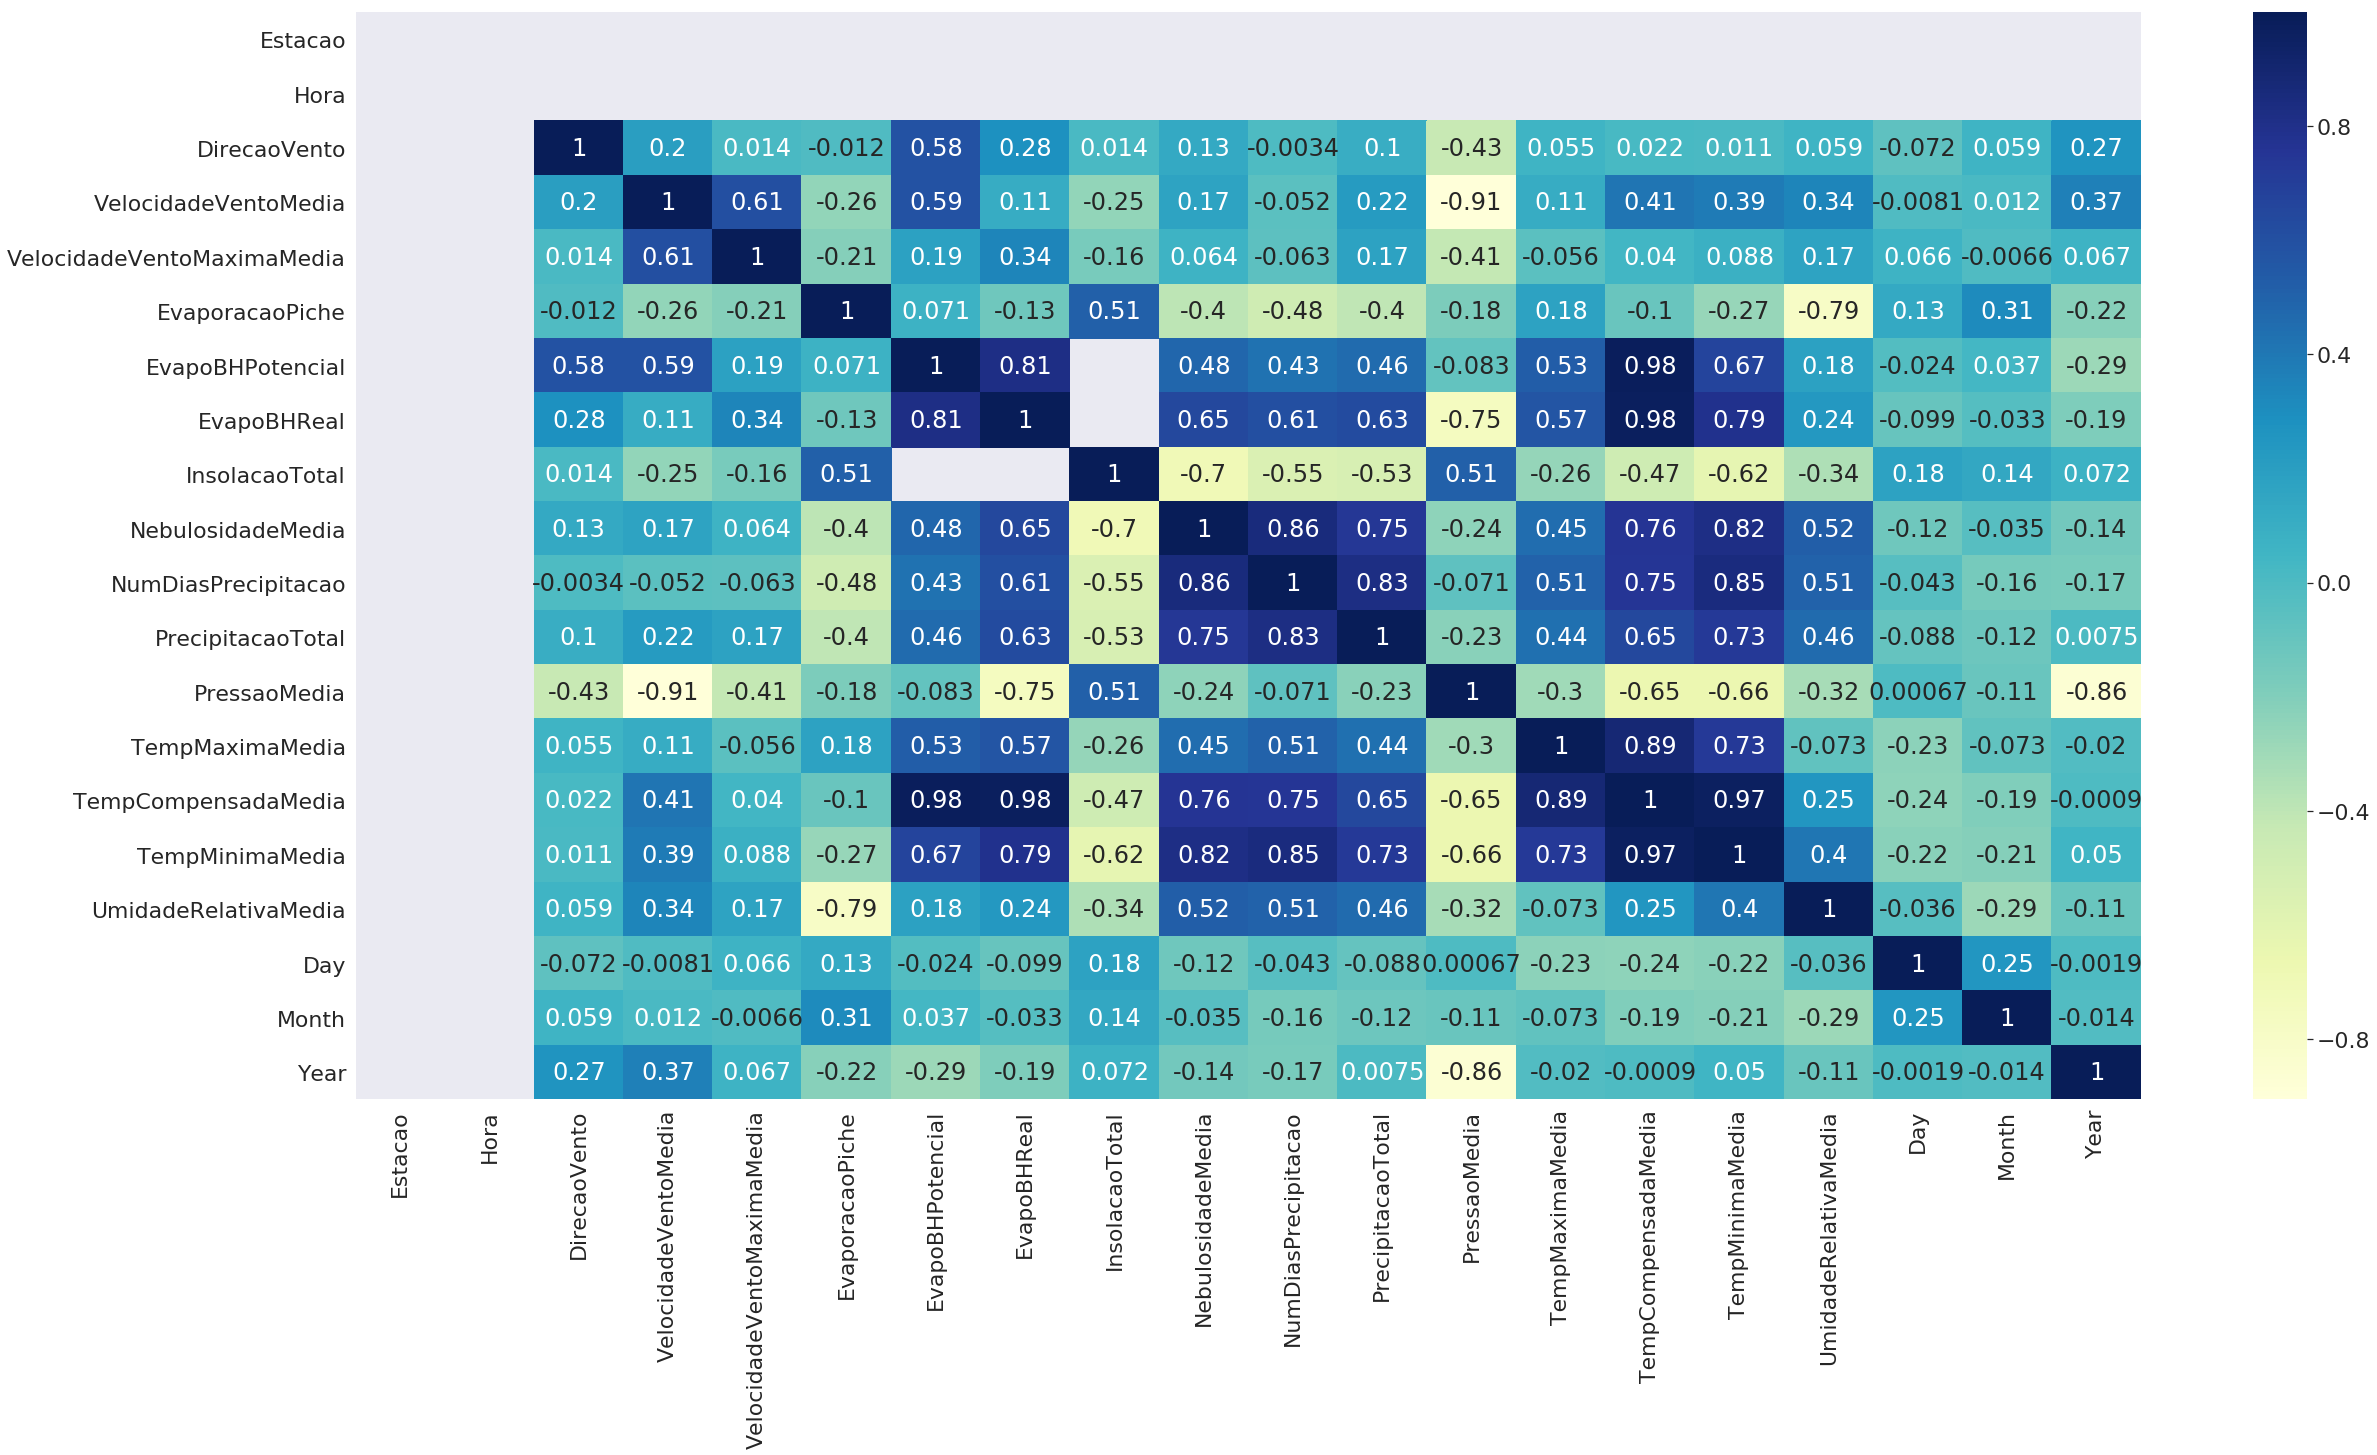

In [18]:
fig = plt.figure(figsize=(40,20))
sns.set(font_scale= 2.0)
sns.heatmap(df_data_cj.corr(), annot=True, cmap="YlGnBu")

In [19]:
df_data_cj.dtypes

Estacao                         int64
Hora                            int64
DirecaoVento                  float64
VelocidadeVentoMedia          float64
VelocidadeVentoMaximaMedia    float64
EvaporacaoPiche               float64
EvapoBHPotencial              float64
EvapoBHReal                   float64
InsolacaoTotal                float64
NebulosidadeMedia             float64
NumDiasPrecipitacao           float64
PrecipitacaoTotal             float64
PressaoMedia                  float64
TempMaximaMedia               float64
TempCompensadaMedia           float64
TempMinimaMedia               float64
UmidadeRelativaMedia          float64
Day                             int64
Month                           int64
Year                            int64
dtype: object

In [20]:
df_data_cj.isnull().count()

Estacao                       453
Hora                          453
DirecaoVento                  453
VelocidadeVentoMedia          453
VelocidadeVentoMaximaMedia    453
EvaporacaoPiche               453
EvapoBHPotencial              453
EvapoBHReal                   453
InsolacaoTotal                453
NebulosidadeMedia             453
NumDiasPrecipitacao           453
PrecipitacaoTotal             453
PressaoMedia                  453
TempMaximaMedia               453
TempCompensadaMedia           453
TempMinimaMedia               453
UmidadeRelativaMedia          453
Day                           453
Month                         453
Year                          453
dtype: int64

In [66]:
df_data_cj.sort_values(by="PrecipitacaoTotal")[:10]

,Estacao,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,NebulosidadeMedia,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,Day,Month,Year
87,83714,0,0.0,1.066667,7.0,35.1,NaN,NaN,68.4,8.288889,17.0,0.0,NaN,20.213333,15.980000,12.673333,90.083333,30,4,1988
328,83714,0,NaN,NaN,NaN,73.0,94.152462,11.341498,NaN,1.822581,0.0,0.0,NaN,18.474194,NaN,NaN,NaN,31,7,2008
256,83714,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,31,7,2002
186,83714,0,5.0,0.556897,1.2,75.4,NaN,NaN,211.4,3.689655,NaN,0.0,NaN,16.909677,NaN,4.009677,NaN,31,7,1996
163,83714,0,0.0,0.677778,2.0,101.7,NaN,NaN,213.8,2.944444,NaN,0.0,NaN,21.070000,11.124667,3.706667,74.500000,31,8,1994
317,83714,0,NaN,NaN,NaN,86.3,98.235540,90.720080,NaN,3.114754,0.0,0.0,NaN,21.083871,NaN,NaN,NaN,31,8,2007
424,83714,0,NaN,NaN,NaN,49.5,69.304201,49.994741,NaN,2.730769,NaN,0.0,NaN,17.723077,NaN,6.736364,NaN,31,7,2016
262,83714,0,NaN,NaN,NaN,NaN,87.224587,87.224587,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,31,1,2003
53,83714,0,0.0,0.791111,2.0,57.7,NaN,NaN,204.1,3.388889,NaN,0.0,846.963333,19.743333,10.772667,4.443333,84.041667,30,6,1984
93,83714,0,0.0,0.827957,2.0,NaN,NaN,NaN,93.7,7.655914,16.0,0.0,NaN,20.100000,14.492903,10.219355,89.653226,31,10,1988


In [67]:
df_data_cj.sort_values(by="PrecipitacaoTotal")[-10:]

,Estacao,Hora,DirecaoVento,VelocidadeVentoMedia,VelocidadeVentoMaximaMedia,EvaporacaoPiche,EvapoBHPotencial,EvapoBHReal,InsolacaoTotal,NebulosidadeMedia,NumDiasPrecipitacao,PrecipitacaoTotal,PressaoMedia,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia,Day,Month,Year
310,83714,0,NaN,NaN,NaN,32.5,116.292221,116.292221,NaN,9.241935,26.0,370.6,NaN,22.038710,NaN,NaN,NaN,31,1,2007
167,83714,0,9.0,1.053763,5.0,72.3,NaN,NaN,125.9,7.763441,19.0,376.2,NaN,23.264516,17.825161,13.041935,83.782258,31,12,1994
24,83714,0,0.0,1.254237,9.0,37.4,NaN,NaN,87.7,7.779661,20.0,382.4,844.010169,20.224138,15.808276,12.210345,NaN,31,1,1982
169,83714,0,0.0,0.988095,4.0,47.1,NaN,NaN,95.3,7.797619,20.0,385.0,NaN,22.485714,17.951429,14.603571,86.339286,28,2,1995
358,83714,0,NaN,NaN,NaN,41.4,116.292221,116.292221,NaN,7.681319,25.0,389.5,NaN,NaN,NaN,14.350000,87.525862,31,1,2011
47,83714,0,0.0,0.978495,2.0,36.6,NaN,NaN,72.5,9.483871,27.0,395.2,843.631183,20.932258,16.460000,13.600000,90.862903,31,12,1983
275,83714,0,5.0,2.077586,5.0,40.5,NaN,NaN,NaN,7.982759,21.0,402.5,NaN,21.524138,NaN,NaN,NaN,29,2,2004
286,83714,0,27.0,2.675806,6.9,42.6,NaN,NaN,NaN,8.290323,26.0,407.2,834.003226,22.122581,NaN,NaN,NaN,31,1,2005
382,83714,0,NaN,NaN,NaN,28.9,85.600942,85.600942,NaN,8.645161,29.0,419.0,NaN,21.361290,NaN,NaN,NaN,31,1,2013
345,83714,0,NaN,NaN,NaN,39.3,88.240798,88.240798,NaN,8.327586,28.0,426.4,NaN,22.441935,17.652308,13.570968,NaN,31,12,2009


In [72]:
df_data_cj.groupby(["DirecaoVento","EvapoBHPotencial"])["Month"].prod()

DirecaoVento  EvapoBHPotencial
5.0           34.229331            6
              47.530239            5
9.0           58.322736            4
              78.987452            2
              82.097283            3
              94.060670            7
              111.373401          11
23.0          95.601708            5
27.0          90.058455            6
              90.083740            6
              98.235540            8
              110.072921          10
              117.442971          12
32.0          81.346581            1
Name: Month, dtype: int64